In [2]:
import pandas as pd
import numpy as np
from pprint import pprint
import os
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [3]:
!python -m spacy download en_core_web_lg 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [4]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [5]:
# run only the first time

# import nltk
# nltk.download('all')

In [6]:
df = pd.read_csv('mkbhd.csv')
data = pd.read_csv('Data.csv')


In [7]:
def getSentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    return scores

In [8]:
from gensim.parsing.preprocessing import remove_stopwords

# had to use this as the dataset may exceed the max length for spacy
all_scripts = []
for script in data['Scripts'].values:
    all_scripts.append(remove_stopwords(script))


In [9]:
filteredScripts = []

for script in all_scripts:

      d = nlp(script)
      script_annotated = [tok.text for tok in d if not
                                  (tok.is_punct or tok.is_stop 
                                    or tok.is_space or tok.pos_ == "PROPN" )
                                  ]                         
      script_annotated_string = ' '.join(script_annotated)                         
      filteredScripts.append(script_annotated_string)

In [10]:
data['Filtered Scripts'] = filteredScripts
data.head(2)

,Unnamed: 0,Year,Video Count,Longest Video Duration,Shortest Video Duration,Avg Video Duration,Avg Words Per Minute,Avg Words Per Video,Scripts,Filtered Scripts
0,0,2024,14,224187.900000,29944.816667,73535.635714,0.262551,539.016857,I'm curious how accurate the step counters are...,curious accurate step counters smart watches o...
1,1,2023,44,640761.466667,11921.683333,103612.321970,0.148138,332.212455,so I'm seated on the left side which is not th...,seated left driver newest car sick lot crazy f...


In [11]:
scatterDf = pd.DataFrame(columns=['Year', 'Positive', 'Negative', 'Neutral'])


scores = {}
for row in data.values:
    #row[9] is filtered scripts
    scores[row[1]] = getSentiment(row[9])

for key, value in scores.items():
    scatterDf.loc[len(scatterDf.index)] = [key, value['pos'], value['neg'], value['neu']]

In [12]:
pprint(scatterDf)

      Year  Positive  Negative  Neutral
0   2024.0     0.303     0.054    0.643
1   2023.0     0.296     0.044    0.660
2   2022.0     0.288     0.049    0.663
3   2021.0     0.295     0.047    0.658
4   2020.0     0.293     0.045    0.662
5   2019.0     0.297     0.049    0.654
6   2018.0     0.308     0.060    0.632
7   2017.0     0.299     0.047    0.654
8   2016.0     0.320     0.040    0.640
9   2015.0     0.306     0.046    0.648
10  2014.0     0.274     0.038    0.688
11  2013.0     0.285     0.047    0.668
12  2012.0     0.297     0.037    0.666
13  2011.0     0.292     0.042    0.666
14  2010.0     0.258     0.034    0.709
15  2009.0     0.242     0.017    0.741


<Axes: title={'center': 'Neutral Sentiment Over the Years'}, xlabel='Year'>

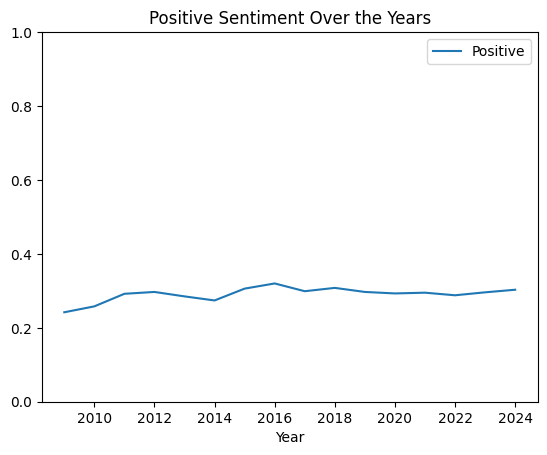

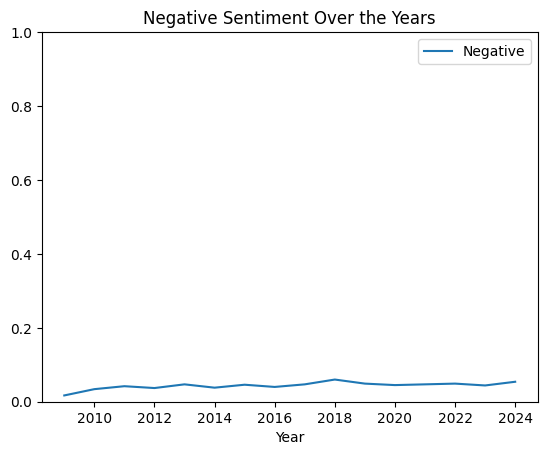

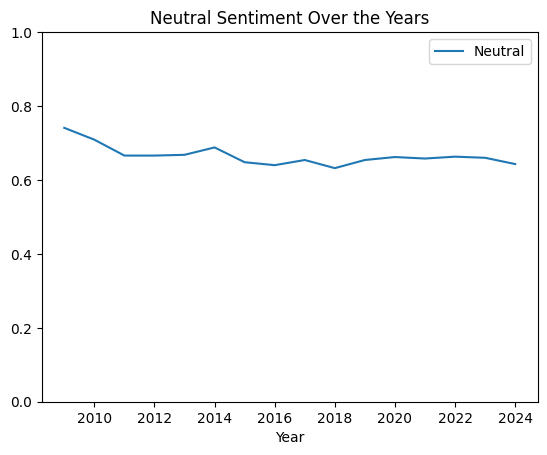

In [13]:
scatterDf.plot.line(x='Year', y='Positive', ylim=(0,1), title='Positive Sentiment Over the Years')
scatterDf.plot.line(x='Year', y='Negative', ylim=(0,1), title='Negative Sentiment Over the Years')
scatterDf.plot.line(x='Year', y='Neutral', ylim=(0,1), title='Neutral Sentiment Over the Years')

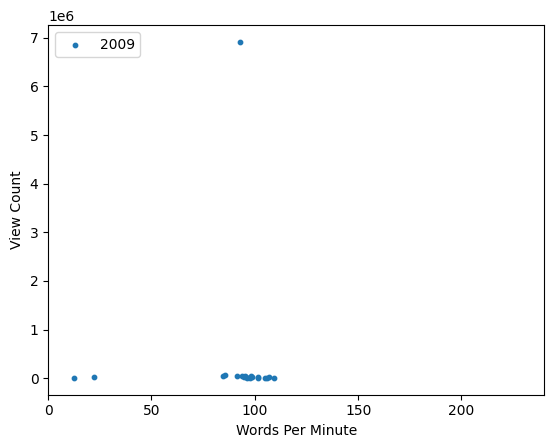

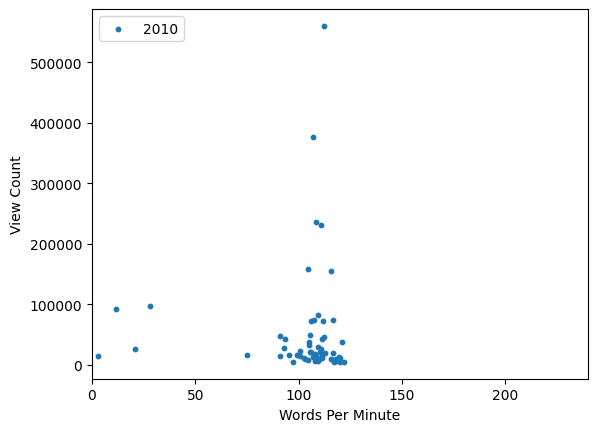

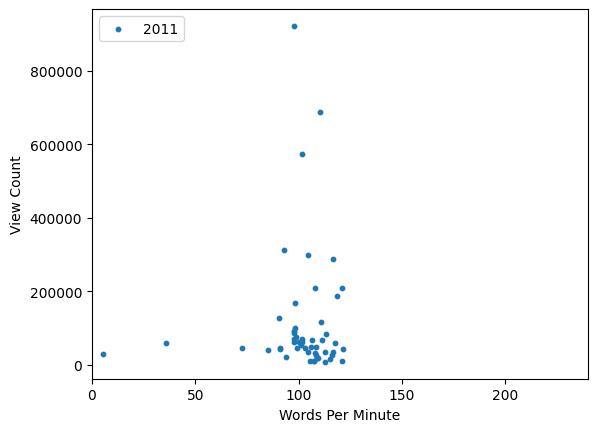

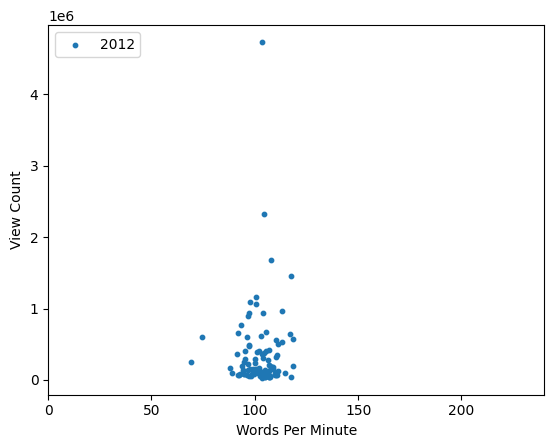

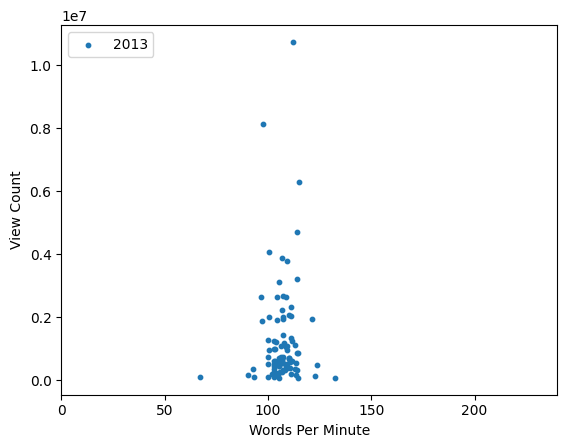

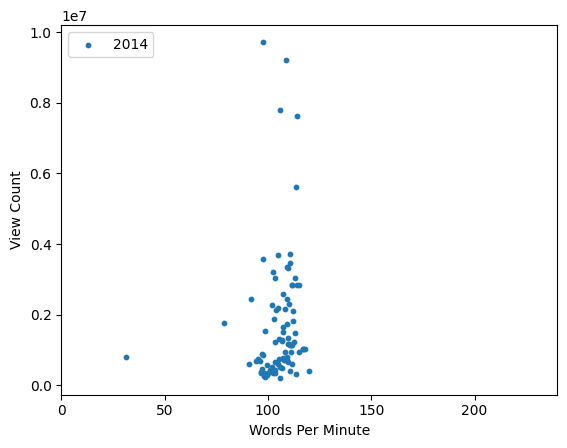

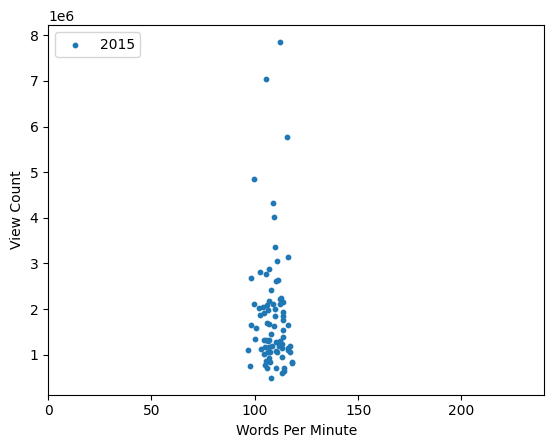

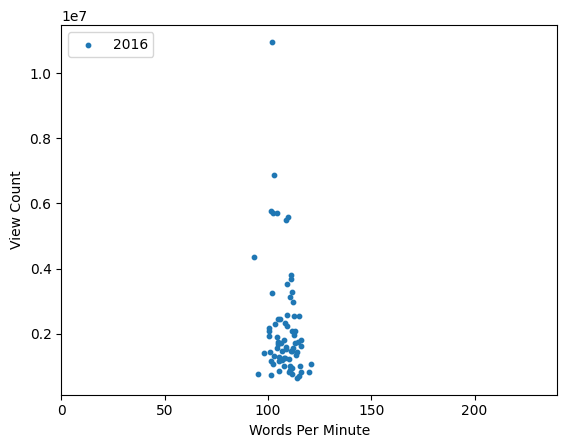

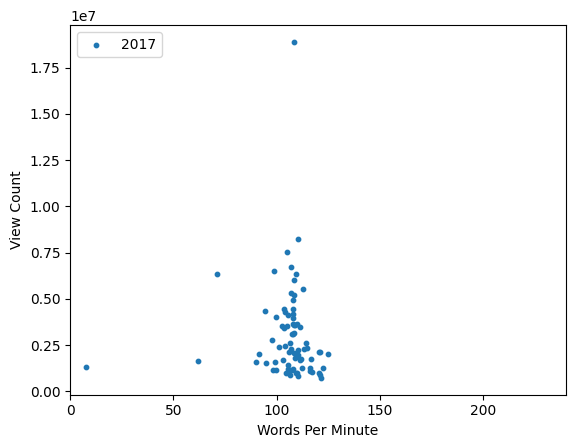

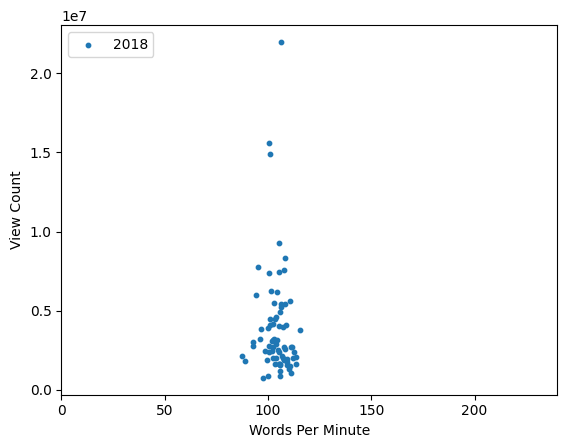

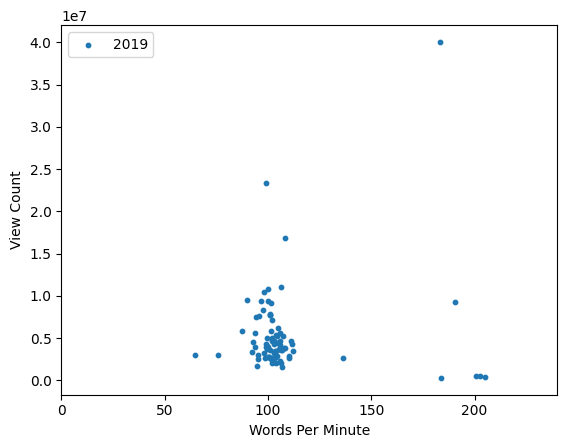

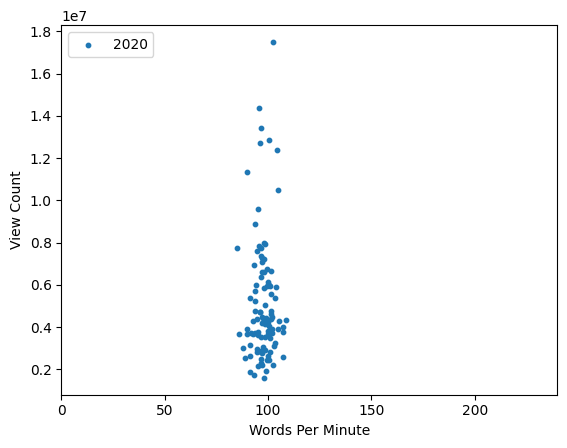

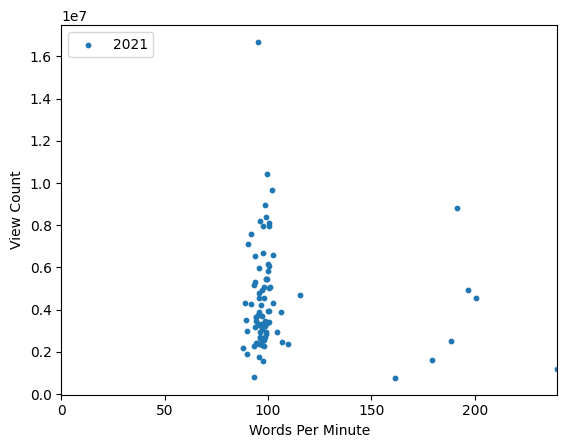

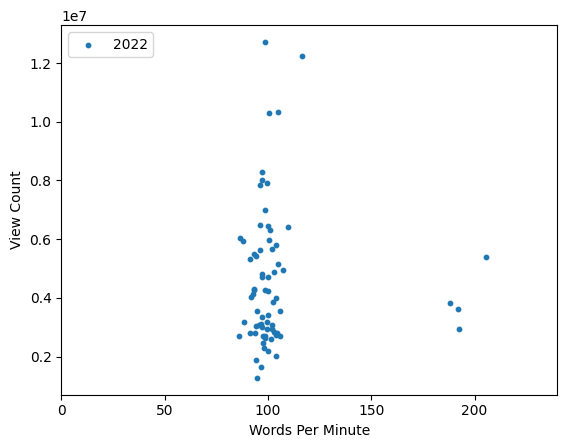

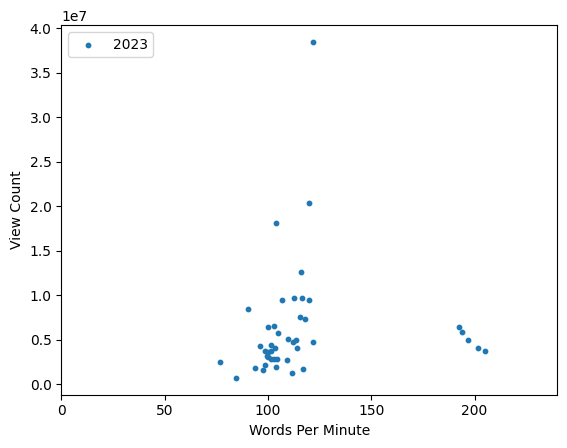

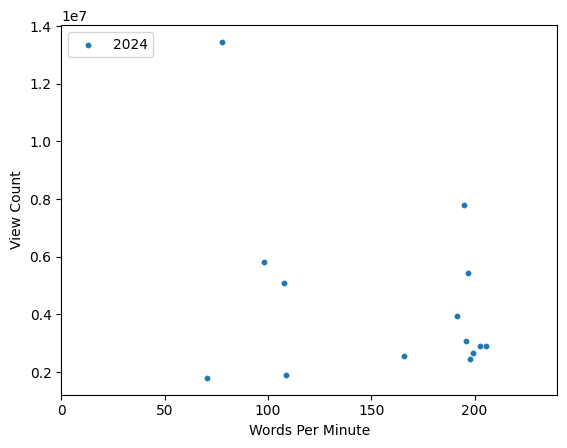

In [19]:
for year, group in df.groupby('Year'):
    fig, currAx = plt.subplots()
    currAx.scatter(group['Words Per Minute'], group['View Count'], label=year, alpha=1, s=10)
    currAx.set_xlim(0, 240)
    currAx.legend(loc='upper left')
    currAx.set_ylabel('View Count')
    currAx.set_xlabel('Words Per Minute')


Text(0.5, 1.0, 'View Count vs. Words Per Minute')

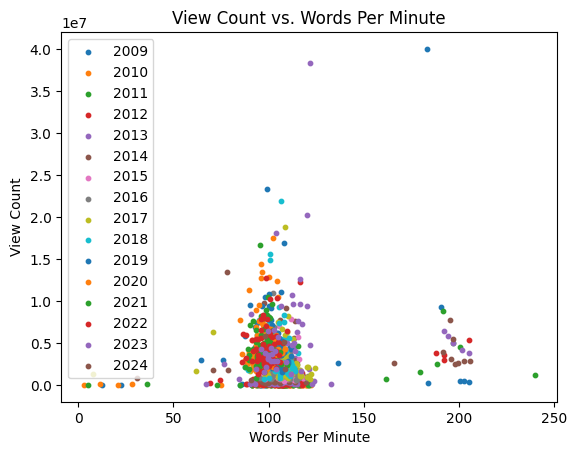

In [15]:
fig, ax = plt.subplots()

years = df['Year'].unique()
for year, group in df.groupby('Year'):
    ax.scatter(group['Words Per Minute'], group['View Count'], label=year, alpha=1, s=10)

# ax.set_ylim(0, 2e7)
ax.set_xlabel('Words Per Minute')
ax.set_ylabel('View Count')
ax.legend(loc='upper left')
ax.set_title('View Count vs. Words Per Minute')

In [16]:
df['Video Duration'] /= 60

print(df.head(1))

   Unnamed: 0           Id                                    Title  \
0           0  GQkkHtBD1BM  Taking 1000 Steps  In Every Smartwatch!   

           Published At                                           Captions  \
0  2024-01-19T23:44:36Z  I'm curious how accurate the step counters are...   

   View Count  Like Count  Video Duration  CaptionsDuration  WordCount  \
0    13451274      515806        1.027333           116.961        152   

   Words Per Minute  Year  
0          77.97471  2024  


Text(0, 0.5, 'View Count')

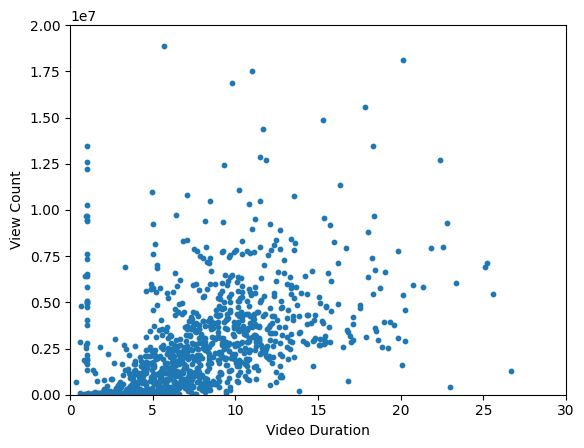

In [22]:
fig, ax = plt.subplots()

x = df['Video Duration']
y = df['View Count']

ax.scatter(x, y, s=10)

ax.set_xlim(0, 30)
ax.set_ylim(0, 2e7)
ax.set_xlabel('Video Duration')
ax.set_ylabel('View Count')


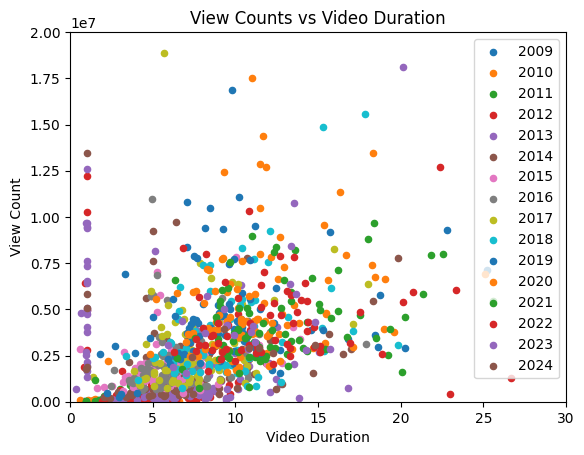

In [24]:
# have set the limits such that the data is visible well. This has resulted in a few datapoints being cut off
fig, ax = plt.subplots()

years = df['Year'].unique()
for year, group in df.groupby('Year'):
    ax.scatter(group['Video Duration'], group['View Count'], label=year, alpha=1, s=20)

ax.set_xlim(0,30)
ax.set_ylim(0, 2e7)
ax.set_xlabel('Video Duration')
ax.set_ylabel('View Count')
ax.set_title('View Counts vs Video Duration')
ax.legend(loc='upper right')